In [212]:
import datetime as datetime
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
dataTroca = pd.read_csv('events.csv') 
dataTroca.info()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [213]:
#Convierto la fecha de crecion en un datetime64[ns]
dataTroca['timestamp'] = pd.to_datetime(dataTroca['timestamp'])

#Se ve que todas las entradas son del 2018
dataTroca.groupby(dataTroca.timestamp.dt.year).count()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
timestamp,,,,,,,,,,,,,,,,,,,,,
2018,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378


In [214]:
groupbyPersonas = dataTroca.loc[:,['person', 'event']].groupby('person')
dicc = {}
for clave, data in groupbyPersonas:
    lista = []
    lista = data.drop_duplicates(subset = 'event', keep = 'first')['event'].tolist()
    dicc[clave] = lista

In [215]:
#Obtengo una lista de todos los eventos que tiene esa persona
dataTroca['eventos'] = dataTroca['person'].map(lambda x: dicc[x])
#Obtengo los dias de la seman
dataTroca['dayweek'] = dataTroca.timestamp.dt.dayofweek
#Obtengo la fecha
dataTroca['fecha'] = dataTroca.timestamp.dt.date
#Separo la marca
dataTroca['marca'] = dataTroca['model'].map(lambda x: str(x).split()[0])

In [216]:
#cantidad de personas que ingresaron 27624.
groupbyCantEventos = dataTroca.groupby('person', as_index = False)['event'].agg({'cantEventos': 'count'})
groupbyCantEventos.sort_values(by = 'cantEventos', ascending = False)
dataTroca = pd.merge(dataTroca, groupbyCantEventos, on = 'person')

In [217]:
#Filtro a la gente que no tiene el evento visited_site 
personasConVisitas = dataTroca.loc[dataTroca['event'] == 'visited site']\
                              .drop_duplicates(subset = 'person', keep = 'first')['person'].tolist()

dataNotVisit = dataTroca.loc[dataTroca['person'].isin(personasConVisitas)]

In [218]:
#pierdo solo 2489 registros
dataTroca['timestamp'].count() - dataNotVisit['timestamp'].count()

2489

In [219]:
data2 = dataNotVisit.loc[dataNotVisit['event'] == 'visited site'].groupby(['person', 'fecha'], as_index = False).agg({'city': 'first', 'region': 'first', 'country': 'first', 'device_type': 'first', 'operating_system_version': 'first', 'channel': 'first', 'new_vs_returning': 'first'})

In [224]:
data3 = pd.merge(dataNotVisit, data2, on = ['person', 'fecha'])
data3.drop(['region_x', 'device_type_x', 'operating_system_version_x', 'country_x', 'city_x', 'channel_x', 'new_vs_returning_x'], axis = 1, inplace = True)
data3.rename(columns = {'region_y': 'region', 'device_type_y': 'device_type', 'operating_system_version_y': 'SO', 'city_y': 'city', 'country_y': 'country', 'channel_y': 'channel', 'new_vs_returning_y': 'new_vs_returning'}, inplace =True)

In [225]:
def obtenerSistema(so):
    sistema = so.split()
    if len(sistema) > 1:
        otro = sistema[1].split('.')[0]
        return sistema[0] + ' ' + otro
    else:
        return sistema[0]

In [226]:
data3['SO'] = data3['SO'].map(obtenerSistema)

In [245]:
data3.head() # Este es el dataFrame a utilizar.

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,fecha,marca,cantEventos,region,SO,country,new_vs_returning,device_type,channel,city
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-05-31,nan,4,Pernambuco,Android 6,Brazil,New,Smartphone,Paid,Camaragibe
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-05-31,nan,4,Pernambuco,Android 6,Brazil,New,Smartphone,Paid,Camaragibe
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,2018-05-31,iPhone,4,Pernambuco,Android 6,Brazil,New,Smartphone,Paid,Camaragibe
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,2018-05-31,iPhone,4,Pernambuco,Android 6,Brazil,New,Smartphone,Paid,Camaragibe
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,2018-05-29,Samsung,4,Rio de Janeiro,Android 5,Brazil,New,Smartphone,Paid,Rio de Janeiro


In [246]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999967 entries, 0 to 999966
Data columns (total 28 columns):
timestamp            999967 non-null datetime64[ns]
event                999967 non-null object
person               999967 non-null object
url                  82004 non-null object
sku                  556407 non-null object
model                556783 non-null object
condition            556405 non-null object
storage              556405 non-null object
color                556405 non-null object
skus                 219093 non-null object
search_term          48256 non-null object
staticpage           3533 non-null object
campaign_source      82040 non-null object
search_engine        50645 non-null object
screen_resolution    87378 non-null object
browser_version      87378 non-null object
eventos              999967 non-null object
dayweek              999967 non-null int64
fecha                999967 non-null object
marca                999967 non-null object
cantEvento

In [236]:
#Obtener las personas con conversiones
dataConversion = data3.loc[data3['event'] == 'conversion']
personasCompraron = dataConversion.drop_duplicates(subset = 'person', keep = 'first')['person'].tolist()
dataPersonasCompraron = data3.loc[data3['person'].isin(personasCompraron)]

In [252]:
dataComprasRelizadas = dataConversion.groupby('person', as_index = False)['timestamp'].agg({'cantCompras': 'count'})
data3 = pd.merge(data3, dataComprasRelizadas, on = 'person')

In [231]:
dataAux = dataPersonasCompraron.loc[(dataPersonasCompraron['event'] == 'conversion') | (dataPersonasCompraron['event'] == 'checkout')]\
                     .groupby(['marca', 'event']).agg({'timestamp': 'count'}).unstack()
dataAux.columns = ['cantCheckout', 'cantConversion']

In [232]:
dataAux['relCheckConv'] = dataAux['cantConversion']/dataAux['cantCheckout']

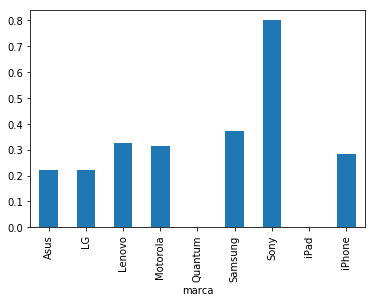

In [233]:
dataAux['relCheckConv'].plot(kind = 'bar')

In [238]:
data3.loc[data3['event'] == 'visited site'].groupby('person')\
['timestamp'].agg({'visitas': 'count'}).sort_values(by = 'visitas', ascending = False).head(10)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,visitas
person,
6b07be7b,263
3b5a5833,168
c38d5de3,160
5af7e2bc,157
5f25cb5d,151
ca3ff2f0,148
2d5a84c1,142
3e34b3cf,139
c013417a,135


In [239]:
data3.loc[data3['event'] == 'visited site'].loc[data3['person'] == '3b5a5833']

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,fecha,marca,cantEventos,region,SO,country,new_vs_returning,device_type,channel,city
220778,2018-02-07 18:18:52,visited site,3b5a5833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-02-07,nan,1705,Minas Gerais,Android 6,Brazil,New,Smartphone,Referral,Formiga
220779,2018-02-09 00:57:20,visited site,3b5a5833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-02-09,nan,1705,Minas Gerais,Android 6,Brazil,Returning,Smartphone,Referral,Pedro Leopoldo
220787,2018-02-11 16:49:22,visited site,3b5a5833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-02-11,nan,1705,Minas Gerais,Android 6,Brazil,Returning,Smartphone,Referral,Pedro Leopoldo
220830,2018-02-14 23:59:32,visited site,3b5a5833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-02-14,nan,1705,Rio Grande do Norte,Android 6,Brazil,Returning,Smartphone,Paid,Natal
220834,2018-02-15 09:54:24,visited site,3b5a5833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-02-15,nan,1705,Rio Grande do Norte,Android 6,Brazil,Returning,Smartphone,Paid,Natal
220844,2018-02-17 03:25:11,visited site,3b5a5833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-02-17,nan,1705,Minas Gerais,Android 6,Brazil,Returning,Smartphone,Direct,Betim
220861,2018-02-17 22:01:36,visited site,3b5a5833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-02-17,nan,1705,Minas Gerais,Android 6,Brazil,Returning,Smartphone,Direct,Betim
220865,2018-02-19 01:07:24,visited site,3b5a5833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-02-19,nan,1705,Minas Gerais,Android 6,Brazil,Returning,Smartphone,Referral,Betim
220867,2018-02-19 11:05:56,visited site,3b5a5833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-02-19,nan,1705,Minas Gerais,Android 6,Brazil,Returning,Smartphone,Referral,Betim
220878,2018-02-19 14:02:29,visited site,3b5a5833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-02-19,nan,1705,Minas Gerais,Android 6,Brazil,Returning,Smartphone,Referral,Betim


In [240]:
data3.loc[(data3['event'] == 'conversion') & (data3['new_vs_returning'] == 'New')].groupby('marca').count()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,dayweek,fecha,cantEventos,region,SO,country,new_vs_returning,device_type,channel,city
marca,,,,,,,,,,,,,,,,,,,,,
Asus,1,1,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
LG,5,5,5,0,5,5,5,5,5,0,...,5,5,5,5,5,5,5,5,5,5
Lenovo,8,8,8,0,8,8,8,8,8,0,...,8,8,8,8,8,8,8,8,8,8
Motorola,37,37,37,0,37,37,37,37,37,0,...,37,37,37,37,37,37,37,37,37,37
Samsung,160,160,160,0,160,160,160,160,160,0,...,160,160,160,160,160,160,160,160,160,160
Sony,1,1,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
iPhone,85,85,85,0,85,85,85,85,85,0,...,85,85,85,85,85,85,85,85,85,85


In [241]:
data3.groupby('channel').count()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,dayweek,fecha,marca,cantEventos,region,SO,country,new_vs_returning,device_type,city
channel,,,,,,,,,,,,,,,,,,,,,
Direct,209276,209276,209276,4044,131489,131592,131487,131487,131487,52136,...,209276,209276,209276,209276,209276,209276,209276,209276,209276,209276
Email,498,498,498,81,239,244,239,239,239,91,...,498,498,498,498,498,498,498,498,498,498
Organic,184146,184146,184146,3408,105459,105543,105459,105459,105459,45553,...,184146,184146,184146,184146,184146,184146,184146,184146,184146,184146
Paid,539863,539863,539863,71880,279988,280139,279988,279988,279988,106481,...,539863,539863,539863,539863,539863,539863,539863,539863,539863,539863
Referral,58202,58202,58202,1761,34842,34872,34842,34842,34842,13069,...,58202,58202,58202,58202,58202,58202,58202,58202,58202,58202
Social,7965,7965,7965,829,4386,4389,4386,4386,4386,1759,...,7965,7965,7965,7965,7965,7965,7965,7965,7965,7965
Unknown,17,17,17,1,4,4,4,4,4,4,...,17,17,17,17,17,17,17,17,17,17


In [242]:
dataPersonasCompraron.groupby('search_engine').count()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,fecha,marca,cantEventos,region,SO,country,new_vs_returning,device_type,channel,city
search_engine,,,,,,,,,,,,,,,,,,,,,
Bing,68,68,68,0,0,0,0,0,0,0,...,68,68,68,68,68,68,68,68,68,68
Google,4725,4725,4725,0,0,0,0,0,0,0,...,4725,4725,4725,4725,4725,4725,4725,4725,4725,4725
Yahoo,29,29,29,0,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29


In [243]:
dataPersonasCompraron.loc[(dataPersonasCompraron['event'] == 'lead') ].sort_values(by = 'timestamp')

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,fecha,marca,cantEventos,region,SO,country,new_vs_returning,device_type,channel,city
14103,2018-01-08 14:04:07,lead,03bdcd81,NaN,NaN,Samsung Galaxy S7 Edge,NaN,NaN,NaN,NaN,...,2018-01-08,Samsung,206,Sao Paulo,Windows 10,Brazil,New,Computer,Direct,São Paulo
587120,2018-01-12 21:37:38,lead,97e0bcf2,NaN,NaN,Motorola Moto G4 Plus,NaN,NaN,NaN,NaN,...,2018-01-12,Motorola,602,Minas Gerais,Android 6,Brazil,New,Smartphone,Organic,Belo Horizonte
460943,2018-01-14 18:59:14,lead,778fcfbd,NaN,NaN,Samsung Galaxy A9 Pro 2016,NaN,NaN,NaN,NaN,...,2018-01-14,Samsung,1195,Minas Gerais,Android 7,Brazil,Returning,Smartphone,Paid,Belo Horizonte
112212,2018-01-15 12:57:53,lead,1de395ee,NaN,NaN,iPhone 7 Plus,NaN,NaN,NaN,NaN,...,2018-01-15,iPhone,163,Sao Paulo,Windows 7,Brazil,Returning,Computer,Direct,São Paulo
704398,2018-01-16 11:05:29,lead,b7d4b10f,NaN,NaN,Samsung Galaxy S8,NaN,NaN,NaN,NaN,...,2018-01-16,Samsung,239,Minas Gerais,Android 5,Brazil,Returning,Smartphone,Direct,Belo Horizonte
461223,2018-01-16 19:40:14,lead,778fcfbd,NaN,NaN,Samsung Galaxy J7 Prime,NaN,NaN,NaN,NaN,...,2018-01-16,Samsung,1195,Minas Gerais,Android 7,Brazil,Returning,Smartphone,Organic,Belo Horizonte
461318,2018-01-17 14:54:03,lead,778fcfbd,NaN,NaN,Motorola Moto Z,NaN,NaN,NaN,NaN,...,2018-01-17,Motorola,1195,Minas Gerais,Android 7,Brazil,Returning,Smartphone,Organic,Belo Horizonte
620331,2018-01-27 00:57:01,lead,a0d4baef,NaN,NaN,Samsung Galaxy J7 Prime,NaN,NaN,NaN,NaN,...,2018-01-27,Samsung,576,Amazonas,Android 4,Brazil,Returning,Smartphone,Social,Manaus
811905,2018-01-27 10:53:36,lead,d12fbe38,NaN,NaN,Samsung Galaxy Note 5,NaN,NaN,NaN,NaN,...,2018-01-27,Samsung,536,Mato Grosso do Sul,Android 5,Brazil,Returning,Smartphone,Organic,Campo Grande
314727,2018-01-30 10:09:43,lead,53a86c44,NaN,NaN,Motorola Moto G4 Plus,NaN,NaN,NaN,NaN,...,2018-01-30,Motorola,207,Pernambuco,Android 6,Brazil,Returning,Smartphone,Organic,Bezerros


In [244]:
dataPersonasCompraron.groupby('device_type').count()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,dayweek,fecha,marca,cantEventos,region,SO,country,new_vs_returning,channel,city
device_type,,,,,,,,,,,,,,,,,,,,,
Computer,74463,74463,74463,4627,40941,40991,40941,40941,40941,18994,...,74463,74463,74463,74463,74463,74463,74463,74463,74463,74463
Smartphone,45714,45714,45714,3773,20142,20196,20142,20142,20142,13344,...,45714,45714,45714,45714,45714,45714,45714,45714,45714,45714
Tablet,525,525,525,20,237,237,237,237,237,199,...,525,525,525,525,525,525,525,525,525,525
Unknown,43,43,43,2,30,30,30,30,30,8,...,43,43,43,43,43,43,43,43,43,43


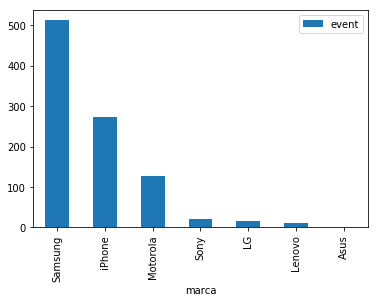

In [255]:
#Marca con mas conversiones
dataConversion.groupby('marca').agg({'event': 'count'}).sort_values(by = 'event', ascending = False).plot(kind = 'bar')

In [254]:
#modelo con mas conversiones
dataConversion.groupby('model').agg({'event': 'count'}).sort_values(by = 'event', ascending = False)

,event
model,
Samsung Galaxy J5,72
iPhone 5s,68
iPhone 6,62
iPhone 6S,34
Samsung Galaxy S6 Flat,30
iPhone 5c,28
Motorola Moto G4 Plus,28
Samsung Galaxy J7,26
Motorola Moto G3 4G,26


In [256]:
#ver los 3 modelos mas vendidos
groupbyModelos = data3.groupby('model')
dataMasVendidos = [groupbyModelos.get_group('Samsung Galaxy J5'), groupbyModelos.get_group('iPhone 5s'), groupbyModelos.get_group('iPhone 6')]


In [257]:
dataMasVendidos[0].groupby('event').count()

,timestamp,person,url,sku,model,condition,storage,color,skus,search_term,...,marca,cantEventos,region,SO,country,new_vs_returning,device_type,channel,city,cantCompras
event,,,,,,,,,,,,,,,,,,,,,
checkout,150,150,0,150,150,150,150,150,0,0,...,150,150,150,150,150,150,150,150,150,150
conversion,72,72,0,72,72,72,72,72,0,0,...,72,72,72,72,72,72,72,72,72,72
lead,1,1,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
viewed product,1572,1572,0,1572,1572,1572,1572,1572,0,0,...,1572,1572,1572,1572,1572,1572,1572,1572,1572,1572


In [258]:
dataMasVendidos[1].groupby('event').count()

,timestamp,person,url,sku,model,condition,storage,color,skus,search_term,...,marca,cantEventos,region,SO,country,new_vs_returning,device_type,channel,city,cantCompras
event,,,,,,,,,,,,,,,,,,,,,
checkout,254,254,0,254,254,254,254,254,0,0,...,254,254,254,254,254,254,254,254,254,254
conversion,68,68,0,68,68,68,68,68,0,0,...,68,68,68,68,68,68,68,68,68,68
lead,3,3,0,0,3,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
viewed product,4317,4317,0,4317,4317,4317,4317,4317,0,0,...,4317,4317,4317,4317,4317,4317,4317,4317,4317,4317


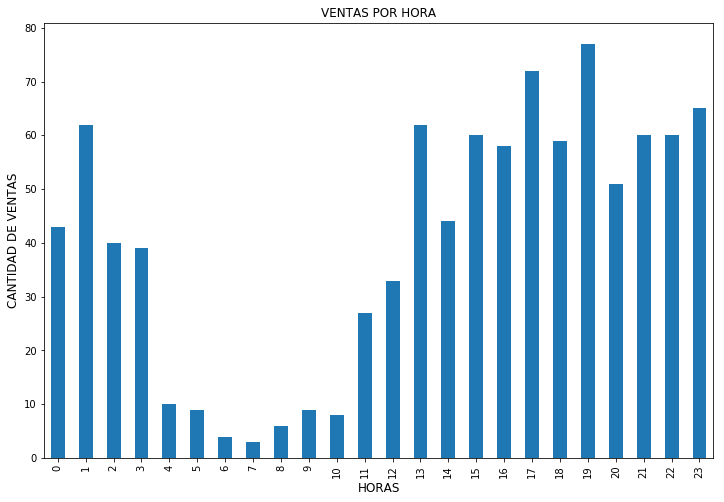

In [259]:
cantConversionesPorHora = dataConversion.groupby(dataConversion.timestamp.dt.hour)['timestamp'].count()
cantConversionesPorHora.plot(kind = 'bar', figsize= (12, 8))

plt.ylabel('CANTIDAD DE VENTAS', fontsize = 12);
plt.xlabel('HORAS', fontsize = 12);
plt.title('VENTAS POR HORA')

In [267]:
#Conversiones por dia de la semana y hora ( ver lo de fillna)
dataConversion.groupby(['dayweek', dataConversion.timestamp.dt.hour]).agg({'timestamp': 'count'}).unstack()

timestamp                                                 ...   \
timestamp        0     1     2    3    4    5    6    7    8    9   ...    
dayweek                                                             ...    
0               6.0   5.0   5.0  4.0  NaN  2.0  NaN  NaN  1.0  2.0  ...    
1              12.0  10.0  11.0  9.0  1.0  NaN  1.0  2.0  1.0  NaN  ...    
2               6.0  18.0   3.0  6.0  3.0  1.0  1.0  NaN  1.0  2.0  ...    
3               5.0   6.0   6.0  4.0  1.0  1.0  1.0  1.0  1.0  NaN  ...    
4               7.0  14.0   4.0  7.0  2.0  2.0  NaN  NaN  1.0  1.0  ...    
5               6.0   5.0   6.0  8.0  3.0  1.0  1.0  NaN  NaN  3.0  ...    
6               1.0   4.0   5.0  1.0  NaN  2.0  NaN  NaN  1.0  1.0  ...    

                                                                       
timestamp    14    15    16    17    18    19    20    21    22    23  
dayweek                                                                
0          12.0   7.0   9.0  11.0  10.0  18.0   7.0  12.0  14.0  11.0  
1           5.0   7.0  11.0  13.0   9.0   7.0  11.0  11.0   9.0  10.0  
2           4.0   8.0   7.0   9.0  11.0  17.0   8.0   9.0   7.0  20.0  
3           9.0  15.0   9.0   9.0  13.0  10.0  14.0  11.0   9.0  11.0  
4           7.0   9.0   9.0  14.0   8.0   9.0   4.0   9.0  10.0  10.0  
5           4.0   9.0   4.0   8.0   3.0   6.0   3.0   4.0   4.0   NaN  
6           3.0   5.0   9.0   8.0   5.0  10.0   4.0   4.0   7.0   3.0  

[7 rows x 24 columns]

In [273]:
#Ver el celu mas vendido
dataConversion.groupby('sku').agg({'timestamp': 'count'}).sort_values(by = 'timestamp', ascending= False)

,timestamp
sku,
6371.0,27
6370.0,15
2692.0,14
7631.0,13
2711.0,11
3371.0,10
3192.0,9
2682.0,8
2667.0,8


In [276]:
dataConversion.loc[dataConversion['sku'] == 6371].groupby('region').count()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,dayweek,fecha,marca,cantEventos,SO,country,new_vs_returning,device_type,channel,city
region,,,,,,,,,,,,,,,,,,,,,
Alagoas,2,2,2,0,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
Amazonas,1,1,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
Bahia,3,3,3,0,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,3,3
Espirito Santo,2,2,2,0,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
Minas Gerais,1,1,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
Parana,2,2,2,0,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
Rio de Janeiro,2,2,2,0,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
Roraima,1,1,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
Santa Catarina,1,1,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [6]:
# ver cuanta gente de los que hizo checkout finalmente compro


,timestamp,person,url,sku,model,condition,storage,color,skus,search_term,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,marca
event,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,82827,82827,82756,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,82827
brand listing,98635,98635,0,0,0,0,0,0,98324,0,...,0,0,0,0,0,0,0,0,0,98635
checkout,33735,33735,0,33735,33733,33733,33733,33733,0,0,...,0,0,0,0,0,0,0,0,0,33735
conversion,1172,1172,0,1172,1172,1172,1172,1172,0,0,...,0,0,0,0,0,0,0,0,0,1172
generic listing,67534,67534,0,0,0,0,0,0,67421,0,...,0,0,0,0,0,0,0,0,0,67534
lead,448,448,0,0,448,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,448
search engine hit,50957,50957,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50957
searched products,56073,56073,0,0,0,0,0,0,55954,48967,...,0,0,0,0,0,0,0,0,0,56073
staticpage,3598,3598,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3598


In [22]:
groupbySKU = dataTroca.groupby('sku', as_index = False)[]

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,marca
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung
13,2018-04-09 20:13:14,viewed product,000a54b2,NaN,12661,Motorola Moto Z Play,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Motorola
22,2018-05-24 11:27:47,viewed product,000a54b2,NaN,10254,iPhone 7 Plus,Excelente,256GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
26,2018-05-24 11:28:59,viewed product,000a54b2,NaN,6581,iPhone 6S,Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
27,2018-05-24 11:29:06,viewed product,000a54b2,NaN,6579,iPhone 6S,Excelente,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
28,2018-05-24 11:29:14,viewed product,000a54b2,NaN,6580,iPhone 6S,Muito Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
29,2018-05-24 11:29:16,viewed product,000a54b2,NaN,6581,iPhone 6S,Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
30,2018-05-24 11:29:19,viewed product,000a54b2,NaN,6580,iPhone 6S,Muito Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
31,2018-05-24 11:29:23,viewed product,000a54b2,NaN,8965,iPhone 6S,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone


In [279]:
#Descubri que todas las personas que generaron un solo evento, fue el de checkout
data3.loc[data3['cantEventos'] == 3].groupby('event').count()

,timestamp,person,url,sku,model,condition,storage,color,skus,search_term,...,marca,cantEventos,region,SO,country,new_vs_returning,device_type,channel,city,cantCompras
event,,,,,,,,,,,,,,,,,,,,,
checkout,5,5,0,5,5,5,5,5,0,0,...,5,5,5,5,5,5,5,5,5,5
conversion,5,5,0,5,5,5,5,5,0,0,...,5,5,5,5,5,5,5,5,5,5
visited site,5,5,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5


In [13]:
#El unico evento que no tiene NaN a new_vs_returning es Visited site
dataAux = dataTrocaEventos.loc[(dataTrocaEventos['cantEventos'] == 2 )]
#dataAux.dropna(subset = ['new_vs_returning']).groupby('event').count()
dataAux.groupby('event').count()

,timestamp,person,url,sku,model,condition,storage,color,skus,search_term,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,marca,cantEventos
event,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
brand listing,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
checkout,428,428,0,428,426,426,426,426,0,0,...,0,0,0,0,0,0,0,0,428,428
conversion,55,55,0,55,55,55,55,55,0,0,...,0,0,0,0,0,0,0,0,55,55
generic listing,2,2,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,2,2
lead,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
staticpage,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
viewed product,29,29,0,29,29,29,29,29,0,0,...,0,0,0,0,0,0,0,0,29,29
visited site,338,338,0,0,0,0,0,0,0,0,...,338,338,338,338,338,338,338,338,338,338


In [25]:
#Los usuarios nuevos son 26898 pero en personas me decian que eran 27624. Era porque no tenian el evento visited site
dataTroca.loc[dataTroca['new_vs_returning'] == 'New'].groupby('event').count()

,timestamp,person,url,sku,model,condition,storage,color,skus,search_term,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,marca
event,,,,,,,,,,,,,,,,,,,,,
visited site,26898,26898,0,0,0,0,0,0,0,0,...,26898,26898,26898,26898,26898,26898,26898,26898,26898,26898


In [7]:
#Los tipos de condiciones
dataTroca.groupby('condition').count()

,timestamp,event,person,url,sku,model,storage,color,skus,search_term,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
condition,,,,,,,,,,,,,,,,,,,,,
Bom,243014,243014,243014,0,243014,243014,243014,243014,0,0,...,0,0,0,0,0,0,0,0,0,0
Bom - Sem Touch ID,15295,15295,15295,0,15295,15295,15295,15295,0,0,...,0,0,0,0,0,0,0,0,0,0
Excelente,152977,152977,152977,0,152977,152977,152977,152977,0,0,...,0,0,0,0,0,0,0,0,0,0
Muito Bom,151359,151359,151359,0,151359,151359,151359,151359,0,0,...,0,0,0,0,0,0,0,0,0,0
Novo,1191,1191,1191,0,1191,1191,1191,1191,0,0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
dataConversion.groupby(['marca', 'region']).agg({'timestamp': 'count'}).sort_values(by = 'timestamp', ascending = False)

timestamp
marca    region                        
Samsung  Sao Paulo                  145
iPhone   Sao Paulo                   84
Samsung  Unknown                     80
iPhone   Unknown                     55
Samsung  Minas Gerais                47
         Rio de Janeiro              40
         Bahia                       32
         Maranhao                    28
iPhone   Rio de Janeiro              27
Motorola Unknown                     25
         Minas Gerais                21
         Sao Paulo                   20
Samsung  Para                        18
         Federal District            17
iPhone   Minas Gerais                15
Samsung  Rio Grande do Norte         15
iPhone   Rio Grande do Sul           14
Samsung  Parana                      11
Motorola Bahia                       11
iPhone   Para                        10
         Federal District            10
         Goias                       10
Samsung  Espirito Santo               9
Motorola Rio de Janeiro               8
Samsung  Mato Grosso do Sul           8
Sony     Unknown                      8
iPhone   Bahia                        8
Samsung  Goias                        8
iPhone   Pernambuco                   7
         Ceara                        7
...                                 ...
Sony     Sao Paulo                    2
Motorola Santa Catarina               2
Samsung  Wrexham                      2
Lenovo   Minas Gerais                 2
LG       Goias                        2
Lenovo   Rio de Janeiro               2
iPhone   Sergipe                      2
Samsung  Mato Grosso                  2
Motorola Paraíba                      2
Samsung  Amazonas                     2
         Alagoas                      2
Motorola Piaui                        2
iPhone   Tocantins                    2
         Rio Grande do Norte          1
         Rondonia                     1
LG       Bahia                        1
iPhone   Parana                       1
LG       Mato Grosso do Sul           1
iPhone   Michigan                     1
         Mato Grosso                  1
         Amazonas                     1
         Acre                         1
LG       Espirito Santo               1
         Minas Gerais                 1
Asus     Unknown                      1
Samsung  Acre                         1
Motorola Espirito Santo               1
         Amapa                        1
Lenovo   Parana                       1
Asus     Sao Paulo                    1

[89 rows x 1 columns]

In [290]:
dataConversion.loc[dataConversion['region'] != 'Unknown'].groupby('region').agg({'timestamp': 'count'})\
              .sort_values(by = 'timestamp', ascending = False).head()

,timestamp
region,
Sao Paulo,260
Minas Gerais,86
Rio de Janeiro,85
Bahia,56
Maranhao,41


In [292]:
dataConversion.groupby('fecha').agg({'timestamp': 'count'})\
              .sort_values(by = 'timestamp', ascending = False).head()

,timestamp
fecha,
2018-05-09,35
2018-05-10,31
2018-05-14,24
2018-05-11,22
2018-04-03,20


In [ ]:
#Ver el progreso de las conversiones a traves de las semanas para: 
#las 5 mejores marcas, las 5 mejores regiones y los dispositivos